In [2]:
import importlib

import autograder
import q1
import q2
import q3

# Natural & Artificial Vision - HW5

In this assignment, we will explore supervised and unsupervised learning.

If you get stuck, suggested resources include:
- https://www.cs.cmu.edu/~16385/s17/Slides/9.5_Backpropagation.pdf
- https://compneuro.neuromatch.io/tutorials/Bonus_Autoencoders/student/Bonus_Intro.html

---
## Question 1 - Backpropagation (80 Pts)

Some help: https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi

1. Fully Connected Neural Networks (FCNNs):
- FCNNs, also known as dense networks, are the most straightforward type of neural networks.
- Each layer in an FCNN represents a simple operation involving matrix-vector multiplication (using weights) followed by a non-linearity (activation function).
- Specifically:
    - Given an input vector (previous layer’s activation), we compute the output of a layer by multiplying it with a weight matrix.
    - Then, we apply a non-linear activation function to the resulting vector.
- This process is repeated for each layer in the network.

2. Deriving the Output:
- In the first part of your task, you’ll be asked to write down the output of the network in terms of its inputs.
- Essentially, you’ll follow the forward pass through the layers, applying the weight matrices and activation functions to compute the final output.

3. Calculating the gradient of the weights:
- In the second part, we’ll focus on computing the derivatives of each weight.
- Specifically, we’ll find how the loss function changes with respect to each weight in the network.
- These derivatives are crucial for training the network using techniques like gradient descent.

4. Optimizing the Network:
- We will update the weight using gradient descent. 
- I have already written the training code using your implementations, If everything goes right, our network will learn the pattern in the data. 

Notes:
- Please show your calculations. You can submit your hand written solutions as screenshots inside the notebook, or use the latex functionality of the notebook. 
- Please don't forget to answer **short** open-ended questions after part 3.

Consider the following simple network:

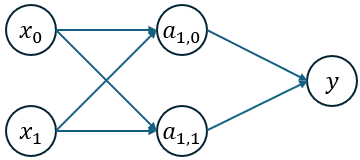

Where each node (circle) shows an activation/input and each line represents a weight.

#### Q1 Part A - Forward Pass

**Derivation:**

Write the output of the network y, as a function of its inputs $x_0$ and $x_1$ (You can show it as a vector with a line $\overline{x}$). For the ease of grading, call your weights at layer i as $W_i$ and activation function as $\sigma$. Also, you can show your weighted sums (results of matrix multiplications before activation) as $\overline{z_i}$ and activations as $\overline{a_i}$ at layer i.

Assumptions:
- The network has sigmoid activation function after each layer. $\sigma(x) = \frac{1}{1+e^{-x}}$
- No biasses. $b_i$ does not exist. This should simplfy the derivative on the next part. 

[YOUR ANSWER HERE]

**Implementation**

In this section you will implement the solution you had written down. The structure for your code is already provided in q1.py. Below you can check if you pass the autograder or not. Please do not hardcode the number of hidden units. We will be modifying it in the future.

In [3]:
importlib.reload(q1)
importlib.reload(autograder)
autograder.test_sigmoid()
autograder.test_networkInitialization()
autograder.test_forward()

Sigmoid: PASS
Network Initialization: PASS
Forward: PASS


#### Q1 Part B - Bacward pass (Backpropagation)
 
 In this section we will test the results of our output using a loss function. Loss function is a differentiable scalar metric that tells us and the network how it is performing. Smaller values of loss function indicate better performance. By taking the derivative of the loss function with respec to to our learnable parameters (weights), we can optimize the network to follow the patterns in our data. 

 Calculation of backpropagation (i.e. the derivatives) can be difficult if you are rusty with linear algebra and calculus. I highly recommend joining the office hours if you are having trouble. 

- Help: https://towardsdatascience.com/deriving-the-backpropagation-equations-from-scratch-part-1-343b300c585a
- Help: https://medium.com/binaryandmore/beginners-guide-to-deriving-and-implementing-backpropagation-e3c1a5a1e536

 Calculate $\frac{\partial L}{\partial W_1}$ and $\frac{\partial L}{\partial W_2}$. More detailed definition of $L$ is given below. 

 **Assumptions**:
 - After each linear layer we have a sigmoid activation function. 
 - Loss function is L2 loss: $L2(y_{label}, y_{prediction}) = \frac{1}{2 \times numberOfExamples}(y_{label}-y_{prediction})^2$

 **Step by step:**:
 - Start by calculating the derivative of sigmoid. Assign a new name for this function (such as $\sigma^\prime_{}$)
 - Second step should be calculating $\frac{\partial L}{\partial W_2}$ and $\frac{\partial L}{\partial a_1}$.
 - By chain rule use $\frac{\partial L}{\partial a_1}$ from previous step to calculate $\frac{\partial L}{\partial W_1}$


 **Tips:**
 - Calculate the derivative of sigmoid in terms of sigmoid.
 - Derivative of $A\overline{x}$ w.r.t. $\overline{x}$ is $A$.
 - Derivative of $A\overline{x}$ w.r.t. $A$ is $\overline{x}^T$.
 
[YOUR ANSWER HERE]

**Implementation:**

Now go back to q1.py and implement backward pass. Later run the code block below to check if your implementations are accurate.

In [4]:
importlib.reload(q1)
autograder.test_L2Loss()
autograder.test_sigmodDerivative()
autograder.test_backward()

L2 Loss: PASS
Sigmoid Derivative: PASS
Backward: PASS


#### Q1 Part C - Updating the weights
In this part there is no derivation to do. You need to implement gradient descent update equation. The update equation is given by: $W_i = W_i - LR \cdot \frac{\partial L}{\partial W_i}$

Finally implement predict(), in this function we make guesses. 

If you pass all the tests including the one below, proceed to the final part. 

In [5]:
importlib.reload(q1)
autograder.test_updateWeights()
autograder.test_predict()

Update Weights: PASS
Predict: PASS


#### Q1 Part D - Training and Experimenting

In this part we will train our network and do some experiments. Most of the code is implemented for you. 


Run the code below to display the data, our task is to classify these points according to their color based on their coordinate. 

d:\Profiles\ohl0286\Downloads\CS353-master\q1.py:74: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


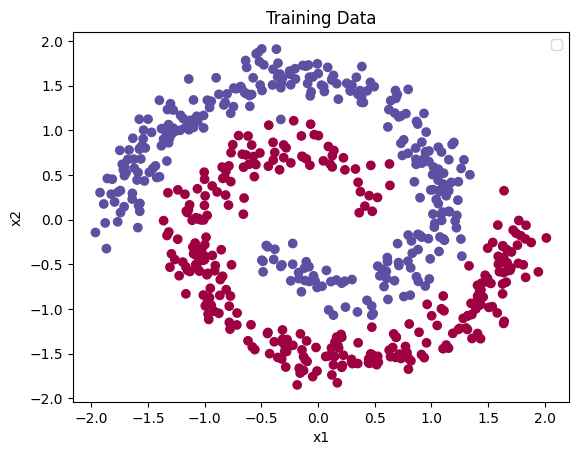

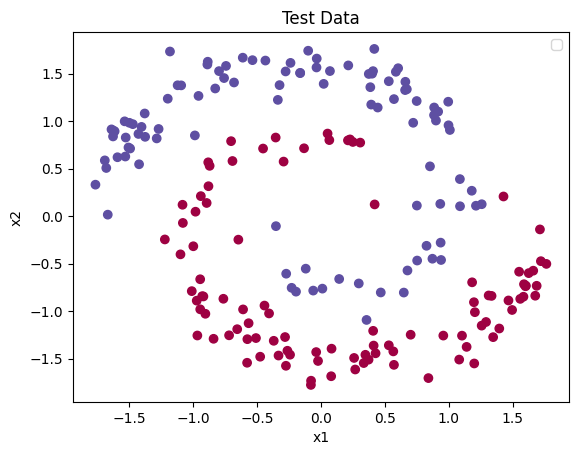

In [6]:
importlib.reload(q1)
X,y,X_test,y_test = q1.loadDataset()
q1.displayData(X, y, title = "Training Data")
q1.displayData(X_test, y_test, title = "Test Data")

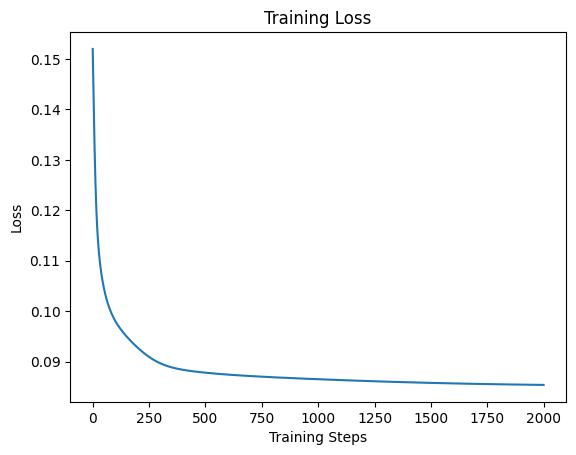

Accuracy: 0.8


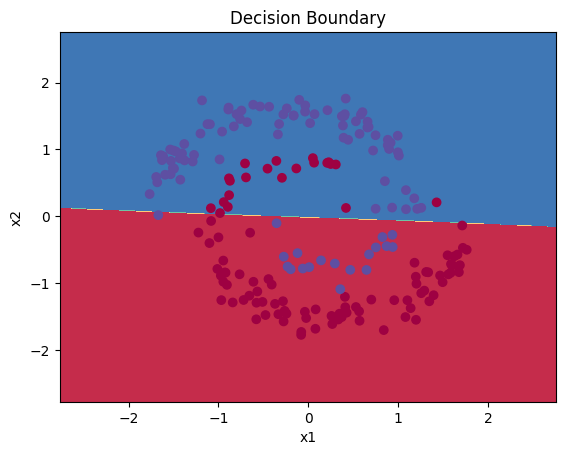

In [7]:
importlib.reload(q1)
network = q1.FCNN(2,4,1, init='random')
lossList = network.train(X, y, 2000, 1.0)
q1.plotTrainingLoss(lossList)
q1.analyzeResults(X_test, y_test, network)

#### Short Open End Questions

After you’ve answered the questions below, make sure to return your code to its original state that passes the autograder before submitting.

- **1:** 
    - In the plot shown earlier, you observed a linear decision boundary with only 2 neurons in the hidden layer. However, this boundary is limited due to the network’s simplicity, resulting in underfitting.
    - To improve the decision boundary, let’s increase the number of neurons in the hidden layer. You can achieve this by modifying the second argument of q1.FCNN() in the code block above.
    - Once you’re satisfied with the decision boundary, please report the number of neurons you used and provide a screenshot of the new decision boundary.

    - Bonus (10 Pts): Between the input and hidden layer, replace the Sigmoid activation function with the ReLU activation function. After making this change, repeat question 1 described above. Remember to modify both the forward and backward functions. 

    I used 20 neurons.
    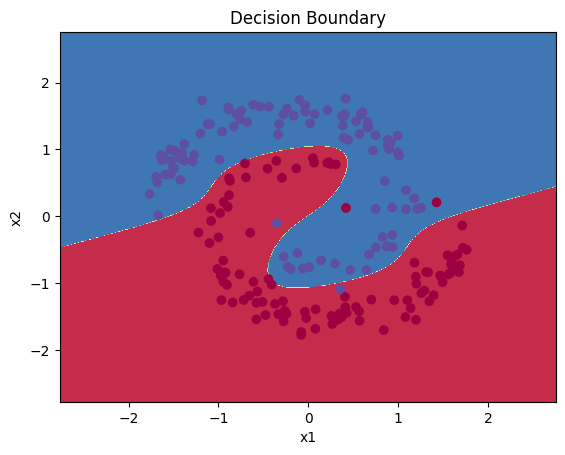

- **2:**
    - Instead of initializing the weights in your network using a gaussian random distribution, consider initializing them to all zeros.
    - To achieve this, you can modify the ‘init’ parameter of the q1.FCNN() class. 
    - Did the network learn anything? Why?

    No, the network didn't learn anything. When all weights are initialized to zero, all neurons in the same layer compute identical outputs during the forward pass. During backpropagation, all neurons in the same layer will receive identical gradient updates. Since all neurons start the same and receive the same updates, they remain identical throughout training and never learn to specialize or detect different features.

---
## Question 2 - Clustering (20 Pts)
- K-Means Clustering Overview:
    - In this question, we’ll explore the k-means clustering algorithm.
    - K-means is an unsupervised algorithm, meaning that our data doesn’t come with any predefined labels. Instead, we aim to group similar data points together.
    - However, k-means can be sensitive to local minima during optimization.
- Random Initialization for Stability:
    - To mitigate the issue of local minima, it’s a best practice to initialize the algorithm multiple times (at least k times, where k is the number of clusters).
    - Each initialization starts from different random centroids, increasing the chances of finding a better solution.
- Optimization Loop:
    - The optimization process in k-means is straightforward and doesn’t involve complex mathematics.
    - Here’s how it works:
        - Load Data: We load our dataset. (Implemented for you)
        - Random Initialization: We randomly initialize the centroids. (Implemented for you)
        - Iterate Until Convergence:
        - Assign Data Points: For each example in the dataset, we assign it to the closest centroid. (You will implement it)
        - Update Centroids: We update the centroid locations by taking the average of the examples assigned to each centroid. (You will implement it)
        - The cost we are optimizing over is the total L2 distance between each data point and its cluster centroid. We will check convergence using this cost function. 

Once you pass the autograder by running the next code block, you can move on to the next section part. 

In [8]:
importlib.reload(q2)
autograder.test_assignClusters()
autograder.test_updateClusters()

Assign Clusters: PASS
Update Clusters: PASS


d:\Profiles\ohl0286\Downloads\CS353-master\q2.py:143: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(data[0, assignments == i], data[1, assignments == i], c=colors[i], label='Cluster ' + str(i))


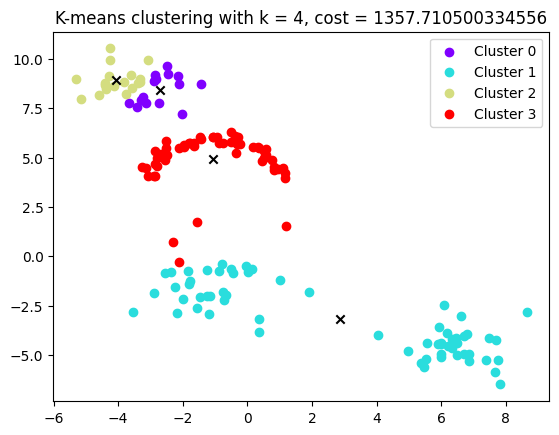

In [9]:
# An example run of the KMeans algorithm:
importlib.reload(q2)
data = q2.loadDataset()
best_clusters, best_assignments, minCost = q2.trainKMeans(data, 4, 100)
q2.visualizeResult(data, best_clusters, best_assignments, minCost)

d:\Profiles\ohl0286\Downloads\CS353-master\q2.py:181: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(data[0, mask], data[1, mask], c=colors[j], alpha=0.7)


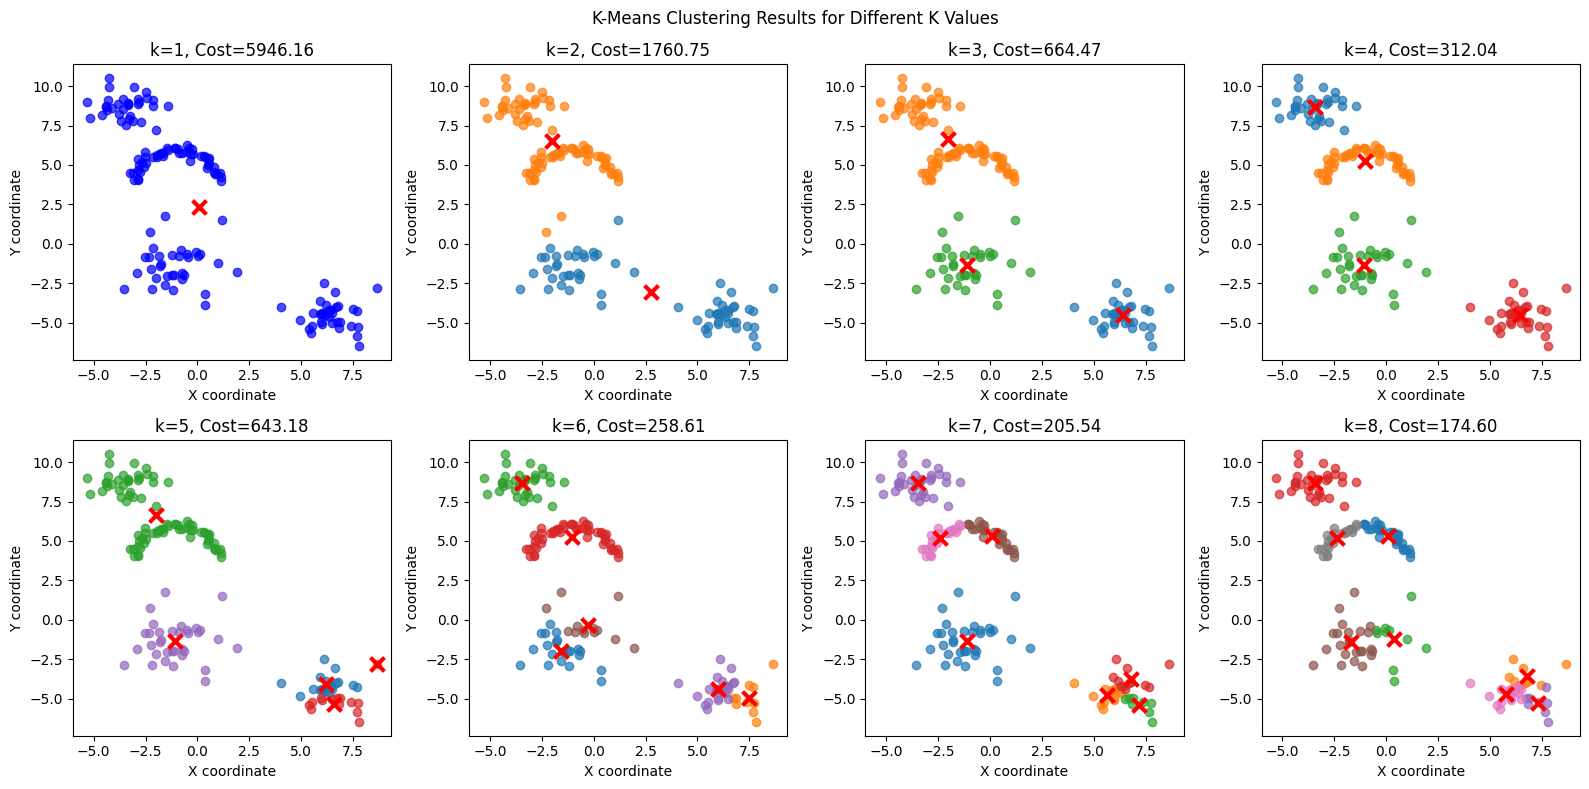

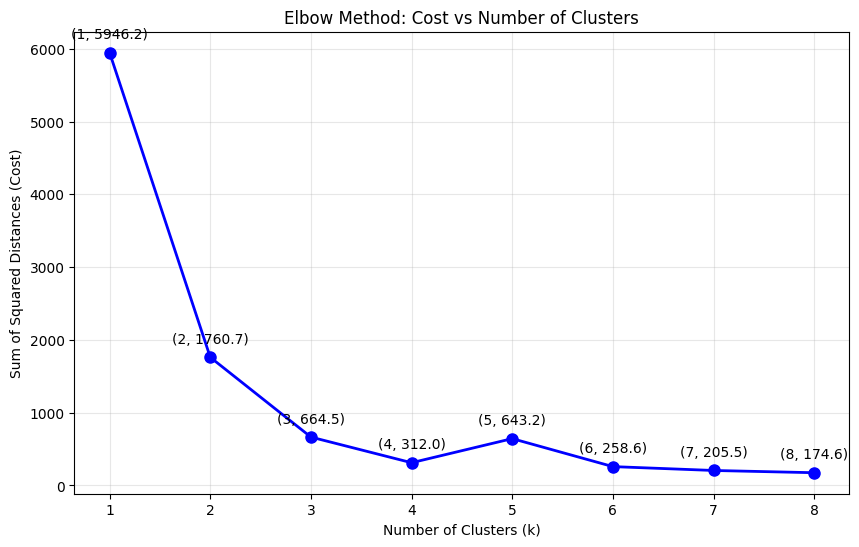

In [10]:
importlib.reload(q2)
k_values, costs = q2.analyzeElbowMethod()

In the class, we explored an algorithm called elbow detection to determine the optimal number of clusters in k-means. For the next question, you’ll create two figures related to the parameter k:
- Visualizing Clustering Results:
    - In the first figure, visualize the clustering results for different numbers of centroids (values of k) (1 to 8 is fine).
- Plotting Loss for a Range of k Values:
    - In the second figure, plot the loss (e.g., sum of squared distances) for a range of k values.
    - Observe how the loss changes as k varies.

Discuss whether the elbow detection algorithm is effective. Does it work well for determining the optimal k?

It is effective. The graph plotted from the elbow method shows that the elbow is at k=4, as increasing k from that point of doesnt lead to continue decrease of loss. This corresponds to the first graph, which shows the most natural-looking clusters when k=4.

Show your results below, please keep the code you used to generate the results in your submission (You probably should create a new function q2.py). Submissions without source code will not be graded. 
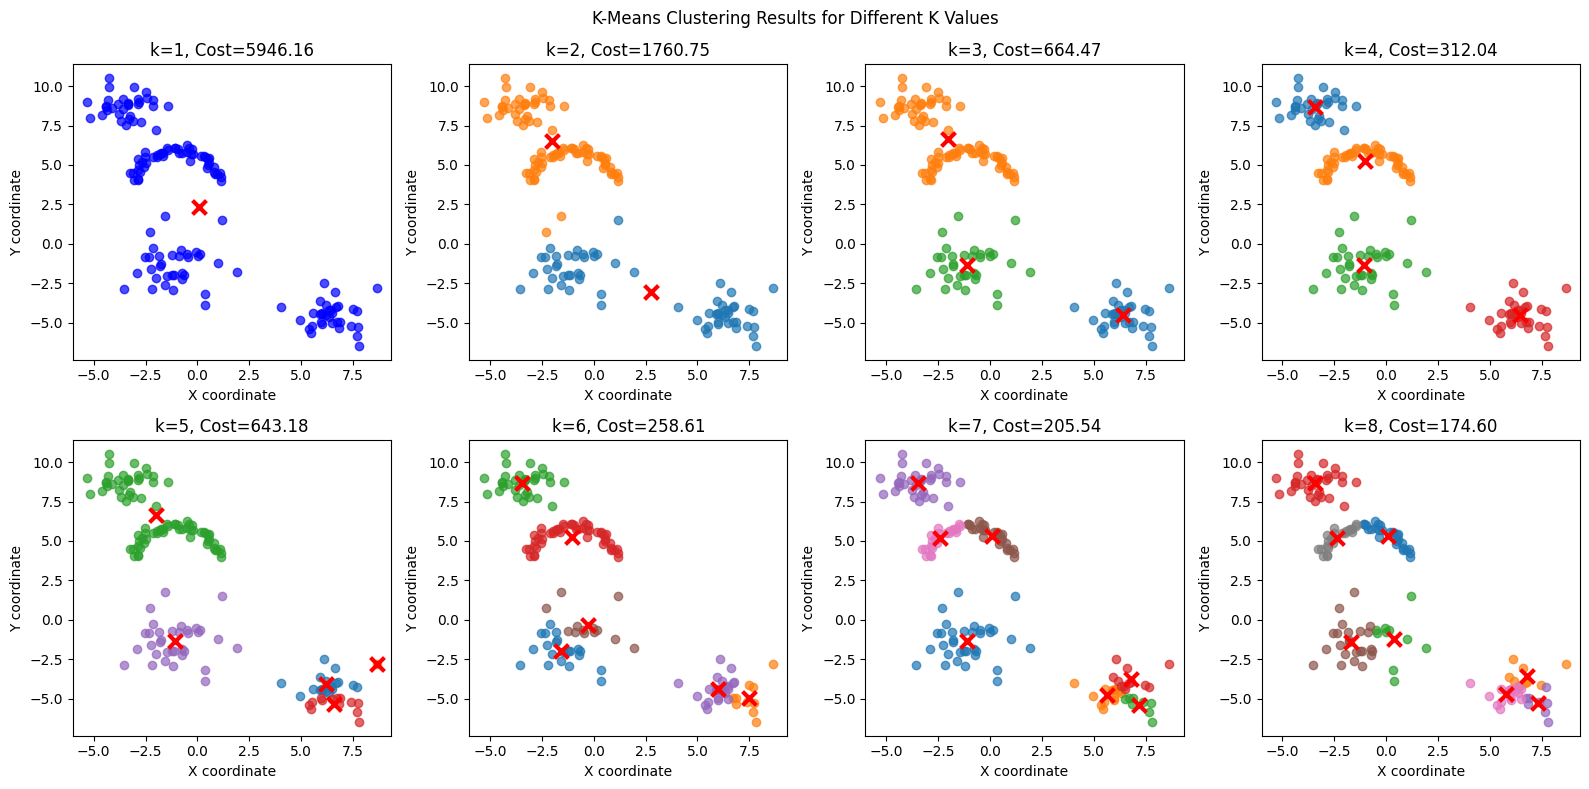

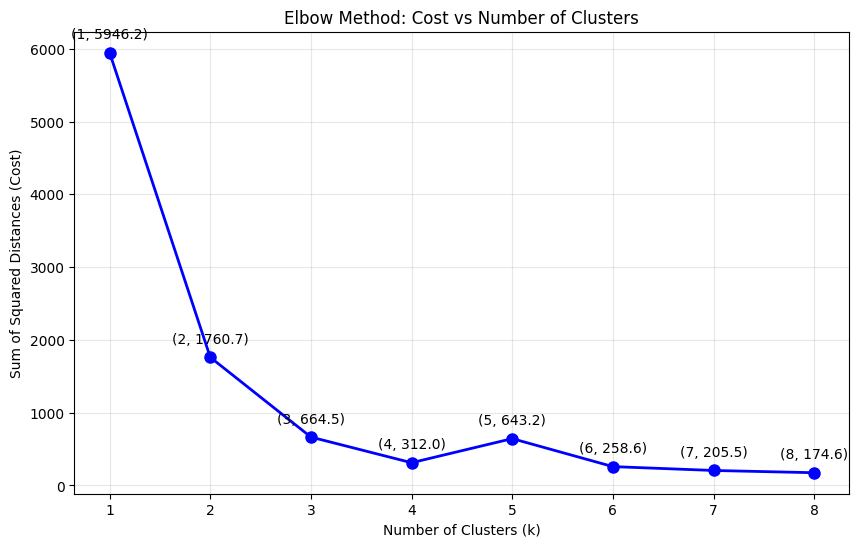

---
## Question 3 - Autoencoders and Visualizing the Latent Space

- Autoencoder Overview:
    - In this question, you’ll train an autoencoder.
    - All the required functions for training are already provided.
- The autoencoder consists of:
    - An encoder with 2 hidden layers that projects the image onto a 2-dimensional latent space.
    - A decoder with 2 hidden layers that recovers the image from its latent space representation.

In [37]:
importlib.reload(q3)
encoder, decoder = q3.train()

Epoch: 0 Loss: 0.054555442184209824
Epoch: 1 Loss: 0.05060665309429169
Epoch: 2 Loss: 0.04421522095799446
Epoch: 3 Loss: 0.05430033430457115
Epoch: 4 Loss: 0.0317874401807785


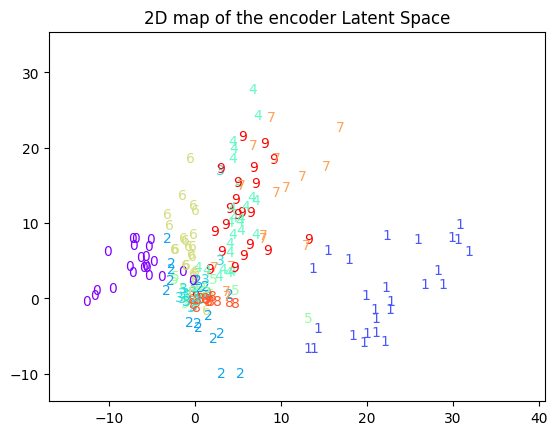

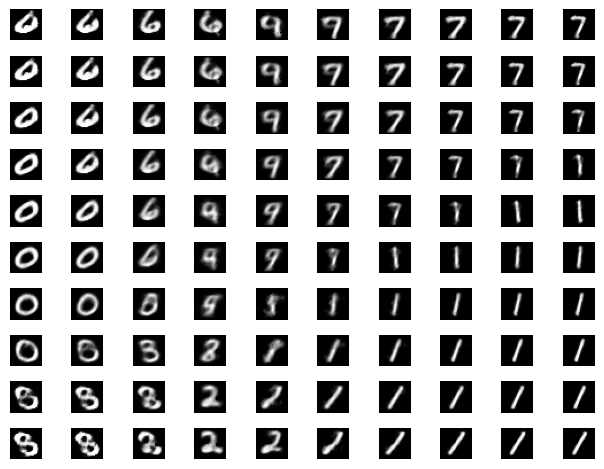

In [38]:
importlib.reload(q3)
latentSpace = q3.plotEncoderMap(encoder, q3.loadMNIST())
q3.plotDecoderMap(decoder, latentSpace)

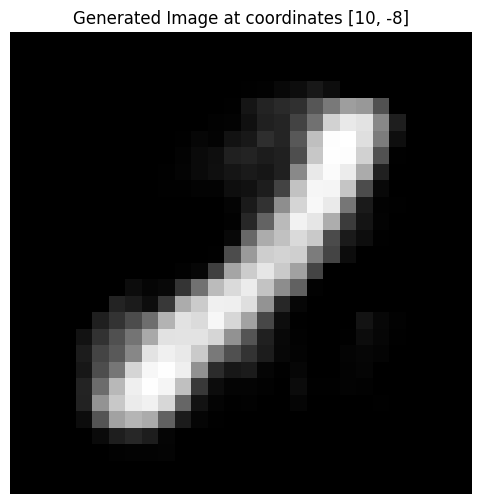

In [50]:
import torch
import matplotlib.pyplot as plt

middle_coords = [10, -8] 
input_tensor = torch.tensor(middle_coords, dtype=torch.float32).unsqueeze(0)
generated_image = decoder(input_tensor)

# Display the generated image
plt.figure(figsize=(6, 6))
plt.imshow(generated_image.detach().numpy().reshape(28, 28), cmap='gray')
plt.title(f'Generated Image at coordinates {middle_coords}')
plt.axis('off')
plt.show()

**Questions:**
- Analysis:
    - Latent Space Map's for the Decoder and Encoder network give us an insight about how the network works. 
    - Randomly train the network couple of more times. 
    - What are some common trends that you observe on latent space map's after each distinct training? 
    Digits cluster in similar regions, but exact positions vary. 0s and 6s tend to be clustered close together across runs.
- Number generation:
    - On the latent space of encoder, pick two distinct numbers.
    - Using the coordinate axis, locate the middle of the two numbers. (Make sure the middle region is not occupied by another number)
    - Input the middle location to the decoder. 
    - How does your output look? Does it match your expectation?
   
   
    It looks like 1. It doesnt really match my expectation as there is actually no number at the coordinate I chose. However it makes sense since 1 is the number closest to that coordinate.
    - Show your results using screenshots. 
    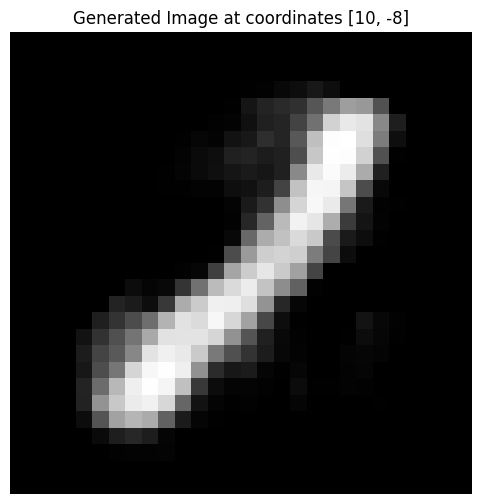

---
## Q4: Project Research

You've submitted a preliminary bibliography that connects a series of papers around a theme. Select an "anchor paper" that feels central to your topic and read it using some of the tools covered in our "how to read a paper" reading (note: I do not expect you to get to the part where you're reimplementing the papers, just to the point that you understand their main arguments). A new tool that we will introduce to help scaffold your understanding is "Heilmeir's catechism". Electrical engineer George H. Heilmeier developed a set of questions that anyone proposing a research project should be able to answer:

1. What are you trying to do? Articulate your objectives using absolutely no jargon.

We are trying to understand how jumping spiders detect extremely small movements using their lateral (secondary) eyes. While the principal eyes are known for detailed vision, we want to show that the lateral eyes can detect very small shifts in motion with surprising precision.

2. How is it done today, and what are the limits of current practice?

Before our study, researchers knew that jumping spiders had multiple eye pairs with different functions: the principal eyes for color and detail, and the secondary eyes for motion detection. However, most studies assumed that motion detection in these lateral eyes was relatively crude and imprecise. No one had systematically quantified how fine their motion sensitivity could be, especially for very small, slow, or near-threshold displacements.

3. What's new in your approach and why do you think it will be successful?

We use a behavioral and optical measurement approach to quantify motion detection thresholds in the lateral eyes. By presenting controlled moving visual stimuli and measuring behavioral responses (orientation, turning), we show that these eyes can detect displacements as small as 0.02° of visual angle, what we call hyperacute motion detection.
Our success comes from combining careful stimulus control, behavioral readouts, and understanding of the spider’s eye geometry. This allows us to isolate how the lateral eyes alone contribute to motion sensitivity.


4. Who cares? If you're successful, what difference will it make?

Understanding this capability changes how we think about modular vision systems. It suggests that high-precision sensing doesn’t need to come only from high-acuity eyes, even low-resolution sensors can detect tiny movements if tuned to the right cues.
This finding has implications for both biology (how distributed attention and motion detection evolved in small animals) and engineering (how to design efficient motion sensors using multiple specialized units rather than one high-resolution camera).


5. What are the risks and the payoffs?

The main risk is misattribution: the spiders’ behavioral responses might involve coordination between eyes, not the lateral eyes alone. We mitigate this by controlling which eyes can see the stimuli.
The payoff is a new model of visual specialization, showing that sensory precision can arise from temporal rather than spatial resolution. It provides a biological proof-of-concept for distributed, multi-eye motion detection systems.


6. How much will it cost? How long will it take? [You can ignore this.]
7. What are the midterm and final "exams" to check for success?

Midterm exam: Demonstrate measurable behavioral responses (orientation) to minute stimulus displacements that lateral eyes alone can detect.
Final exam: Quantitatively establish detection thresholds and show that they exceed what is expected from the optical and neural resolution of the lateral eyes—thus confirming “hyperacuity.”

Attempt to answer these questions from the point of view of your anchor paper's authors.

---

## Bookkeeping:

**Graduate/Undergraduate**: Undergraduate

**Estimated time spent on this assignment:** 10h

**Optional Feedback:** I really like this assignment! Especially Q1. It give very clear instruction on how to implement forward and backward pass and loss computation, and helps me understand the concepts so much better.

In [51]:
importlib.reload(q1)
importlib.reload(q2)
importlib.reload(autograder)
autograder.gradeAll()

Sigmoid: PASS
Network Initialization: PASS
Forward: PASS
L2 Loss: PASS
Sigmoid Derivative: PASS
Backward: PASS
Update Weights: PASS
Predict: PASS
Assign Clusters: PASS
Update Clusters: PASS
